In [7]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
# Assuming Bureau as the dataframe
# MEMPREDIKSI RISIKO GAGAL BAYAR

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
Bureau= pd.read_csv("/content/drive/MyDrive/Course/File/bureau.csv")

In [11]:
print(Bureau.shape)
print(Bureau.info())

(1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [12]:
print(Bureau.head(5))

   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN         

In [13]:
from sklearn.impute import SimpleImputer
bureau_cleaned = Bureau.copy()
# Handle missing values
# Untuk numerical columns, replace missing values with the mean
numerical_cols = bureau_cleaned.select_dtypes(include=[np.number]).columns
bureau_cleaned[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(bureau_cleaned[numerical_cols])
# Untuk categorical columns, replace missing values with the most frequent value
categorical_cols = bureau_cleaned.select_dtypes(include=['object']).columns
bureau_cleaned[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(bureau_cleaned[categorical_cols])

In [14]:
print(bureau_cleaned.head(100))

    SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0     215354.0     5714462.0        Closed      currency 1       -497.0   
1     215354.0     5714463.0        Active      currency 1       -208.0   
2     215354.0     5714464.0        Active      currency 1       -203.0   
3     215354.0     5714465.0        Active      currency 1       -203.0   
4     215354.0     5714466.0        Active      currency 1       -629.0   
..         ...           ...           ...             ...          ...   
95    119939.0     5714578.0        Closed      currency 1      -1572.0   
96    119939.0     5714579.0        Closed      currency 1      -1791.0   
97    119939.0     5714580.0        Active      currency 1      -2401.0   
98    119939.0     5714581.0        Closed      currency 1      -1624.0   
99    119939.0     5714582.0        Closed      currency 1      -1617.0   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                  0.0          -

In [15]:
print(bureau_cleaned.columns)

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


In [16]:
columns_to_drop = ['CREDIT_CURRENCY', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE']
bureau_cleaned = bureau_cleaned.drop(columns=columns_to_drop, axis=1)
print(bureau_cleaned.head(100))

    SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  DAYS_CREDIT_ENDDATE  \
0     215354.0     5714462.0        Closed       -497.0          -153.000000   
1     215354.0     5714463.0        Active       -208.0          1075.000000   
2     215354.0     5714464.0        Active       -203.0           528.000000   
3     215354.0     5714465.0        Active       -203.0           510.517362   
4     215354.0     5714466.0        Active       -629.0          1197.000000   
..         ...           ...           ...          ...                  ...   
95    119939.0     5714578.0        Closed      -1572.0         -1179.000000   
96    119939.0     5714579.0        Closed      -1791.0         -1703.000000   
97    119939.0     5714580.0        Active      -2401.0           510.517362   
98    119939.0     5714581.0        Closed      -1624.0           203.000000   
99    119939.0     5714582.0        Closed      -1617.0          9341.000000   

    DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_O

In [17]:
print(bureau_cleaned.isnull().sum())

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
DAYS_CREDIT               0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64


In [18]:
# Memprediksi risiko gagal bayar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [19]:
# Separate features (X) and target variable (y)
X_bureau = bureau_cleaned.drop('CREDIT_ACTIVE', axis=1)  # Asumsi 'CREDIT_ACTIVE' sebagai target variable
y_bureau = bureau_cleaned['CREDIT_ACTIVE']
# Split data; training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bureau, y_bureau, test_size=0.2, random_state=42)

In [20]:
# Define numerical and categorical features
numerical_features = X_bureau.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_bureau.select_dtypes(include=['object']).columns

In [21]:
# Transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
# Preprocessor to handle both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# Pipeline with the preprocessor and the classifier (Random Forest)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [24]:
# Fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CREDIT_TYPE'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [25]:
# Predict on the testing data
y_pred_test = model.predict(X_test)

In [30]:
# Evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Prediksi menggunakan model
y_pred_test = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Ganti kategori-kategori yang tidak termasuk dalam "Gagal Bayar" dengan "Tidak Gagal Bayar"
y_test_combined = pd.Series(y_test).replace(['Active', 'Closed', 'Other'], 'Not Default').values
y_pred_test_combined = pd.Series(y_pred_test).replace(['Active', 'Closed', 'Other'], 'Not Default').values

# Mengukur metrik pada data yang sudah dimodifikasi
accuracy_combined = accuracy_score(y_test_combined, y_pred_test_combined)
precision_combined = precision_score(y_test_combined, y_pred_test_combined, average='weighted')
recall_combined = recall_score(y_test_combined, y_pred_test_combined, average='weighted')
conf_matrix_combined = confusion_matrix(y_test_combined, y_pred_test_combined)

# Set target metrik yang ditetapkan
target_recall_combined = 0.8

# Bandingkan recall dengan target metrik
if recall_combined >= target_recall_combined:
    print(f"Model memenuhi target recall yang diinginkan ({target_recall_combined:.2%}).")
else:
    print(f"Perlu perbaikan, recall sekarang {recall_combined:.2%} masih di bawah target ({target_recall_combined:.2%}).")

# Kesimpulan berdasarkan evaluasi
if accuracy_combined > 0.8:
    print("Model memiliki tingkat akurasi yang baik.")
else:
    print("Perhatian: tingkat akurasi perlu diperbaiki.")

if precision_combined > 0.75:
    print("Model memiliki tingkat presisi yang baik.")
else:
    print("Perhatian: tingkat presisi perlu diperbaiki.")

# Menampilkan confusion matrix
print("Confusion Matrix:\n", conf_matrix_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model memenuhi target recall yang diinginkan (80.00%).
Model memiliki tingkat akurasi yang baik.
Model memiliki tingkat presisi yang baik.
Confusion Matrix:
 [[     0      5      0]
 [     0 341881     69]
 [     0    692    639]]


In [36]:
import numpy as np
y_pred_test = model.predict(X_test)


# Set threshold
threshold = 0.5 #sebagai nilai default untuk memprediksi kelas positif. Ketika hasil probabilitas dari model melebihi 0.5, observasi tersebut diprediksi sebagai kelas positif, dan sebaliknya,
# Adjust predictions based on threshold
y_pred_adjusted = np.where(y_pred_test_prob[:, 1] >= threshold, 'Gagal Bayar', 'Tidak Gagal Bayar')
# Evaluasi model setelah penyesuaian threshold
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted, average='weighted')
recall_adjusted = recall_score(y_test, y_pred_adjusted, average='weighted')
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
# Menampilkan hasil evaluasi
print(f"Threshold Adjusted Metrics:")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"Precision: {precision_adjusted:.4f}")
print(f"Recall: {recall_adjusted:.4f}")
print("Confusion Matrix:\n", conf_matrix_adjusted)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold Adjusted Metrics:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
Confusion Matrix:
 [[     0      0      0      0 126181]
 [     0      0      0      0      5]
 [     0      0      0      0 215769]
 [     0      0      0      0   1331]
 [     0      0      0      0      0]]


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9972646714401403
Precision: 0.9970778078147318
Recall: 0.9972646714401403
Confusion Matrix:
 [[125955      0    166     60]
 [     2      0      3      0]
 [     7      0 215753      9]
 [   431      0    261    639]]


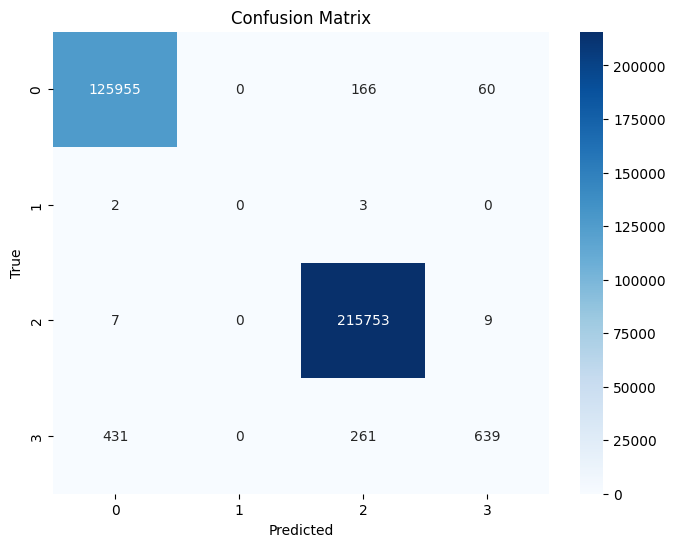

In [45]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [49]:
# Ganti 'nama_dataframe' dengan nama dataframe Anda
nama_dataframe = bureau_cleaned

# Menampilkan distribusi kelas
distribusi_kelas = nama_dataframe['CREDIT_ACTIVE'].value_counts()

# Menampilkan hasil
print("Distribusi Kelas:")
print(distribusi_kelas)

Distribusi Kelas:
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64


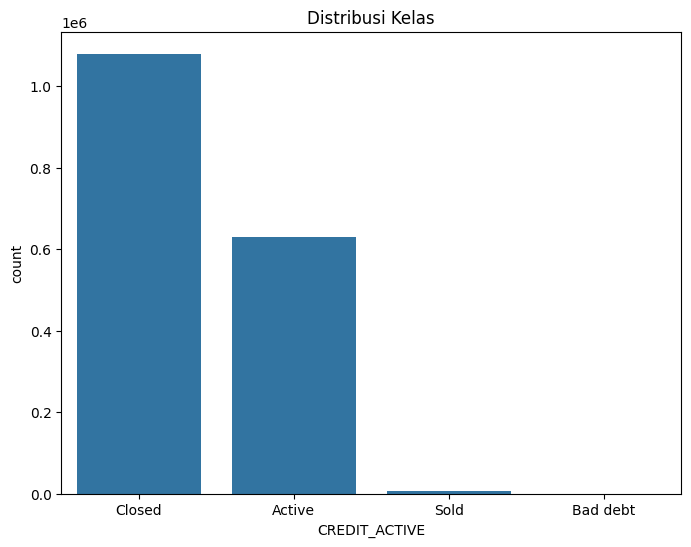

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='CREDIT_ACTIVE', data=nama_dataframe)
plt.title('Distribusi Kelas')
plt.show()

Visualisasi

Mencari Insight

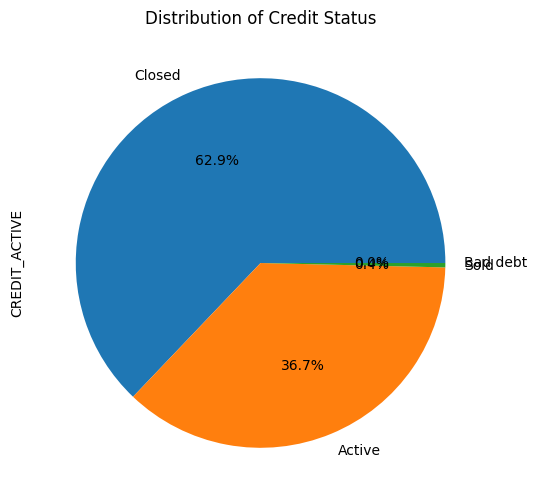

In [27]:
# Distribusi Kredit Aktif dan Tertutup
plt.figure(figsize=(8, 6))
bureau_cleaned['CREDIT_ACTIVE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Credit Status')
plt.show()

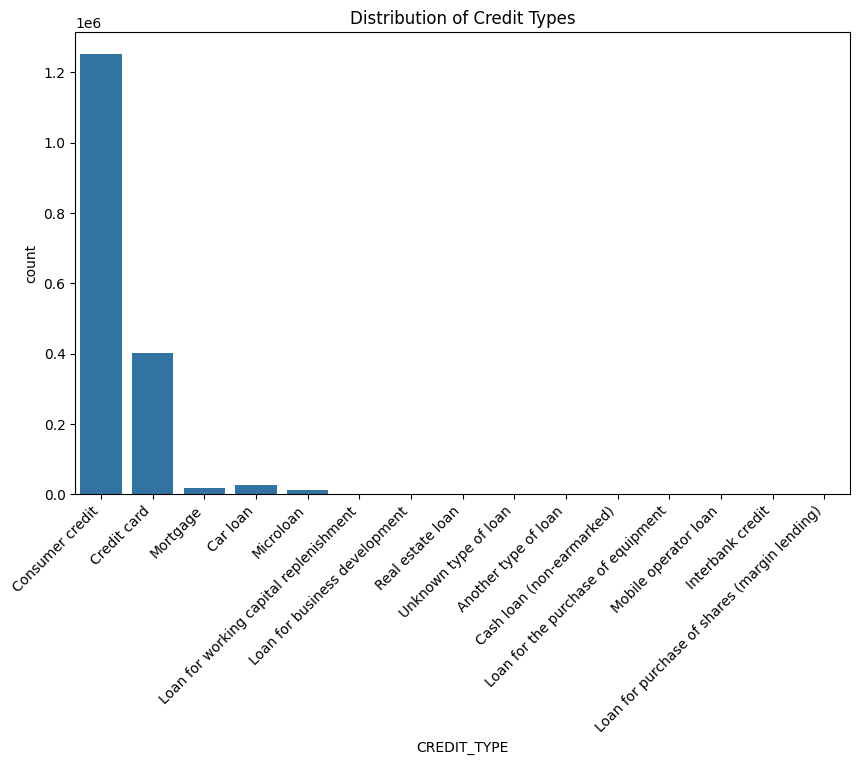

In [28]:
# Distribusi Jenis Kredit
plt.figure(figsize=(10, 6))
sns.countplot(x='CREDIT_TYPE', data=bureau_cleaned)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Credit Types')
plt.show()

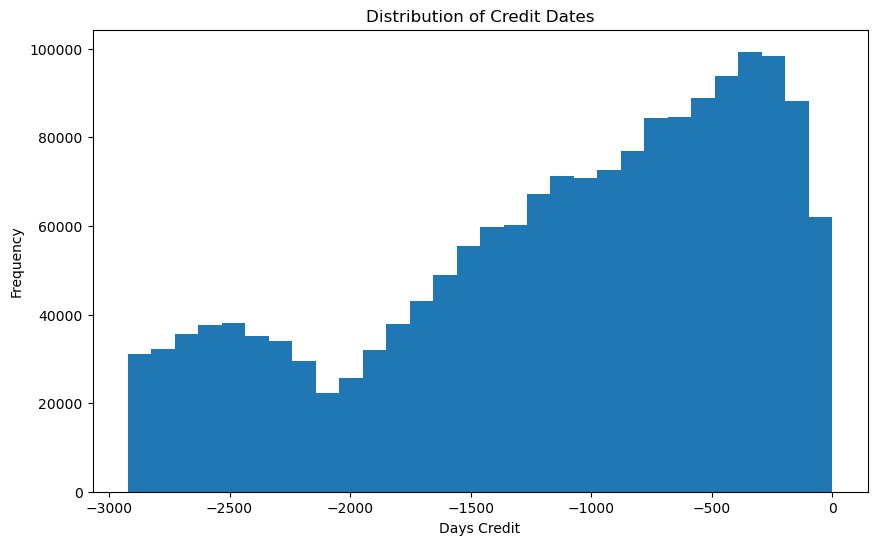

In [ ]:
# Histogram Tanggal Kredit
plt.figure(figsize=(10, 6))
bureau_cleaned['DAYS_CREDIT'].plot(kind='hist', bins=30)
plt.title('Distribution of Credit Dates')
plt.xlabel('Days Credit')
plt.show()

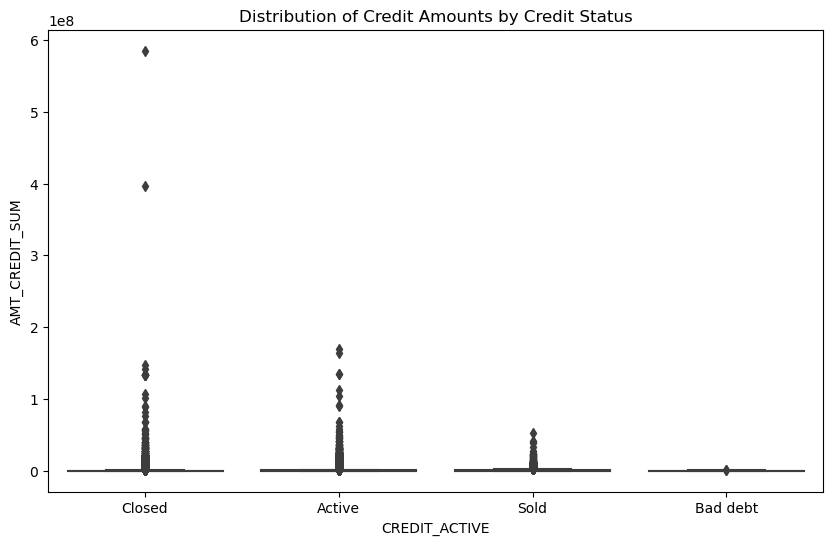

In [ ]:
# Distribusi Jumlah Kredit
plt.figure(figsize=(10, 6))
sns.boxplot(x='CREDIT_ACTIVE', y='AMT_CREDIT_SUM', data=bureau_cleaned)
plt.title('Distribution of Credit Amounts by Credit Status')
plt.show()

<ipython-input-57-1d1a2a87a1af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bureau_cleaned.corr()


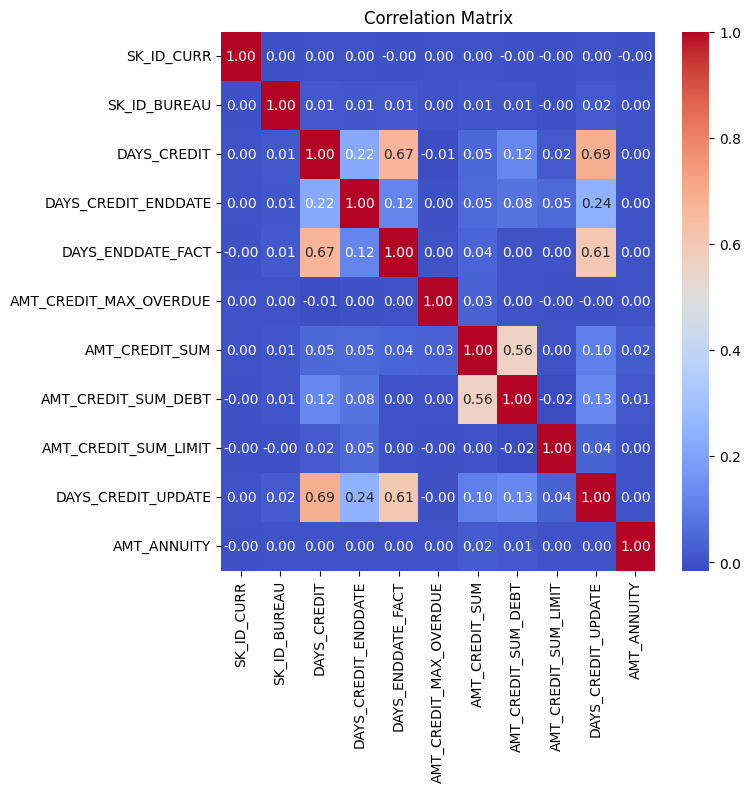

In [57]:
# Hitung korelasi antar fitur
correlation_matrix = bureau_cleaned.corr()
# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

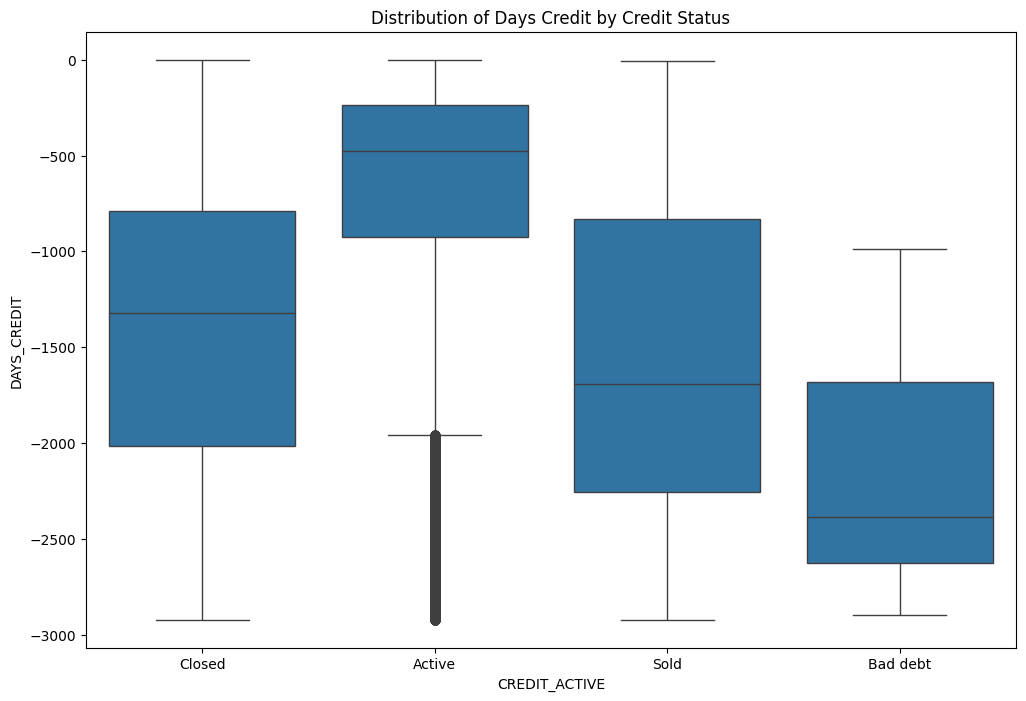

In [52]:
# Visualisasi distribusi variabel berdasarkan target
plt.figure(figsize=(12, 8))
sns.boxplot(x='CREDIT_ACTIVE', y='DAYS_CREDIT', data=bureau_cleaned)
plt.title('Distribution of Days Credit by Credit Status')
plt.show()

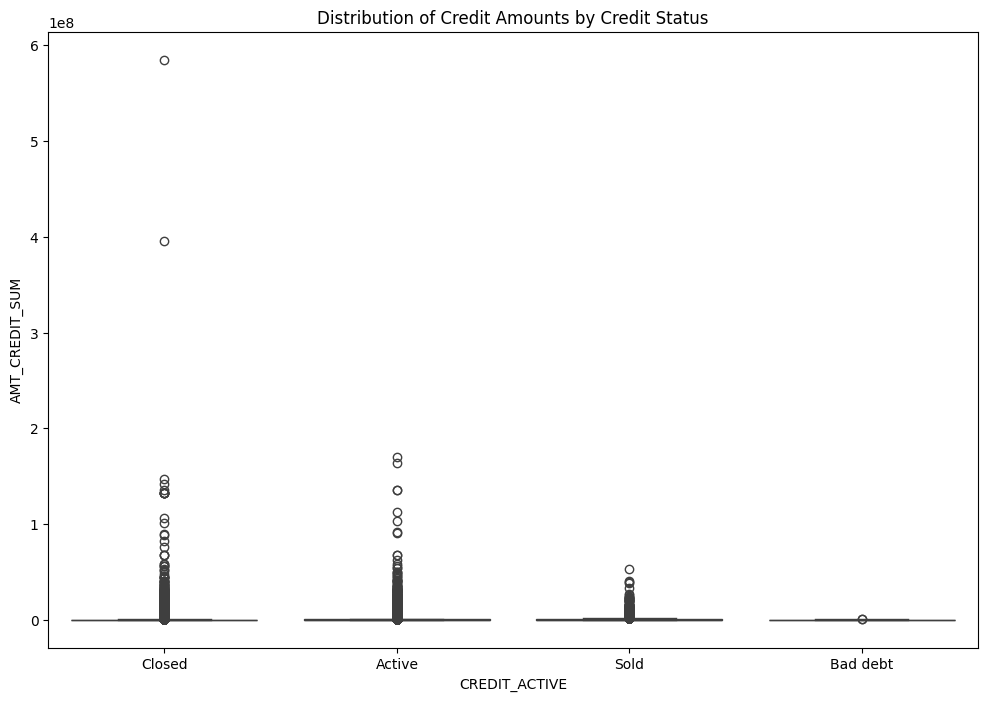

In [53]:
# Identifikasi dan visualisasi outlier pada variabel tertentu
plt.figure(figsize=(12, 8))
sns.boxplot(x='CREDIT_ACTIVE', y='AMT_CREDIT_SUM', data=bureau_cleaned)
plt.title('Distribution of Credit Amounts by Credit Status')
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Variabel target (Y) dan fitur (X)
target_bureau = bureau_cleaned['CREDIT_ACTIVE']  # Menggunakan 'CREDIT_ACTIVE' sebagai variabel target
features_bureau = bureau_cleaned.drop(['CREDIT_ACTIVE'], axis=1)
# Split data; training and testing sets
X_train_bureau, X_test_bureau, y_train_bureau, y_test_bureau = train_test_split(
    features_bureau, target_bureau, train_size=0.8, random_state=42, stratify=target_bureau
)
# Define numerical and categorical features
numerical_features = X_train_bureau.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train_bureau.select_dtypes(include=['object']).columns


In [22]:
# Logistic Regression
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

logreg.fit(X_train_bureau, y_train_bureau)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CREDIT_TYPE'], dtype='object'))])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming 'num' and 'cat' are lists of numerical and categorical features, respectively
numerical_features = X_bureau.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_bureau.select_dtypes(include=['object']).columns
# Create transformers for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='most_frequent')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Update KNN pipeline
pipelineKNN = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier())
])
# Hyperparameter tuning and evaluation
grid_knn_param = {
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': range(2, 8)
}

In [ ]:
grid_search_KNN = GridSearchCV(pipelineKNN, param_grid=grid_knn_param, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search_KNN.fit(X_train_bureau, y_train_bureau)

# Best KNN model from hyperparameter tuning
best_knn_model = grid_search_KNN.best_estimator_

# Metrics for KNN
predictionKNN = best_knn_model.predict_proba(X_test_bureau)[:, 1]
roc_auc_knn = roc_auc_score(y_test_bureau, predictionKNN)
print("ROC-AUC for KNN:", roc_auc_knn)

In [ ]:
Random Forest

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

numerical_features = X_bureau.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_bureau.select_dtypes(include=['object']).columns
# Create transformers for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='most_frequent')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Update Random Forest pipeline
pipelineForest = Pipeline([
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier())
])

In [62]:
# Metrics
predictionForest = forest.predict_proba(X_test_bureau_imputed)[:, 1]
roc_auc = roc_auc_score(y_test_bureau, predictionForest)

print(f"ROC AUC Score: {roc_auc:.3f}")

precision, recall, th = precision_recall_curve(y_test_bureau, predictionForest)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Hyperparameter tuning and training
imputer = SimpleImputer(strategy='most_frequent')
X_train_bureau_imputed = imputer.fit_transform(X_train_bureau)
X_test_bureau_imputed = imputer.transform(X_test_bureau)

# Fit the model
forest.fit(X_train_bureau_imputed, y_train_bureau)

# Now you can make predictions
predictionForest = forest.predict_proba(X_test_bureau_imputed)[:, 1]

Decision Tree

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Create transformers for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='most_frequent')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Update Decision Tree pipeline
pipelineTree = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier())
])

# Pipeline for hyperparameter tuning
grid_tree_params = {
    'tree__max_depth': [7, 9, 11, 13],
    'tree__min_samples_leaf': [8, 10, 12, 15]
}

grid_search_tree = GridSearchCV(pipelineTree, param_grid=grid_tree_params, n_jobs=-1, cv=5, scoring='roc_auc')
grid_search_tree.fit(X_train_bureau, y_train_bureau)


In [ ]:
# Metrics
predictionTree = grid_search_tree.best_estimator_.predict_proba(X_test_bureau)[:, 1]
roc_auc = roc_auc_score(y_test_bureau, predictionTree)

print(f"ROC AUC Score: {roc_auc:.3f}")

precision, recall, th = precision_recall_curve(y_test_bureau, predictionTree)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Gradient Boosting Classifier
boost = GradientBoostingClassifier(n_estimators=200, max_depth=10)
boost.fit(X_train_bureau, y_train_bureau)

# Metrics
predictionBoost = boost.predict_proba(X_test_bureau)[:, 1]
roc_auc = roc_auc_score(y_test_bureau, predictionBoost)

print(f"ROC AUC Score: {roc_auc:.3f}")

precision, recall, th = precision_recall_curve(y_test_bureau, predictionBoost)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Build AdaBoost model
adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=250)
adaBoost.fit(X_train, y_train)

# Make predictions
predictionAda = adaBoost.predict_proba(X_test)[:, 1]

# Evaluate ROC-AUC score
roc_auc = roc_auc_score(y_test, predictionAda)
print(f"ROC-AUC Score: {roc_auc}")

# Calculate precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predictionAda)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
#FEATURE ENGINEERING

In [ ]:
# Membuat fitur rasio
X_bureau['AMT_CREDIT_SUM_DEBT_RATIO'] = X_bureau['AMT_CREDIT_SUM_DEBT'] / X_bureau['AMT_CREDIT_SUM']
# Membuat fitur turunan
X_bureau['DAYS_CREDIT_UPDATE_DIFF'] = X_bureau['DAYS_CREDIT_UPDATE'] - X_bureau['DAYS_CREDIT']

In [ ]:
# Membuat fitur kategoris dari variabel numerik
bins = [0, 10000, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']
X_bureau['AMT_CREDIT_SUM_BIN'] = pd.cut(X_bureau['AMT_CREDIT_SUM'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Menggunakan One-Hot Encoding untuk variabel kategori
X_bureau = pd.get_dummies(X_bureau, columns=['CREDIT_TYPE'], drop_first=True)

In [ ]:
# Membuat fitur interaksi antara dua fitur
X_bureau['INTERACTION_DAYS_CREDIT_AMT_CREDIT_SUM'] = X_bureau['DAYS_CREDIT'] * X_bureau['AMT_CREDIT_SUM']